# Importing Libraries and checking data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv(r"C:\Users\aturk\Downloads\employee_churn_data.csv")

In [4]:
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6,0.446823,0,184.416084,no
3,logistics,0,0.722548,4,high,8,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5,0.577607,1,179.821083,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   int64  
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 745.4+ KB


In [6]:
#lets see the stats of all numerical variables
df.describe()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
count,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000
mean,0.030294,0.651830,3.274843,6.556184,0.504645,0.212055,184.661571
std,0.171403,0.085311,0.579136,1.415432,0.158555,0.408785,4.144831
min,0.000000,0.310000,2.000000,2.000000,0.000000,0.000000,171.374061
25%,0.000000,0.592884,3.000000,5.000000,0.386801,0.000000,181.472085
50%,0.000000,0.647456,3.000000,7.000000,0.500786,0.000000,184.628795
75%,0.000000,0.708429,4.000000,8.000000,0.622607,0.000000,187.728708
max,1.000000,1.000000,5.000000,12.000000,1.000000,1.000000,200.861656


<AxesSubplot:>

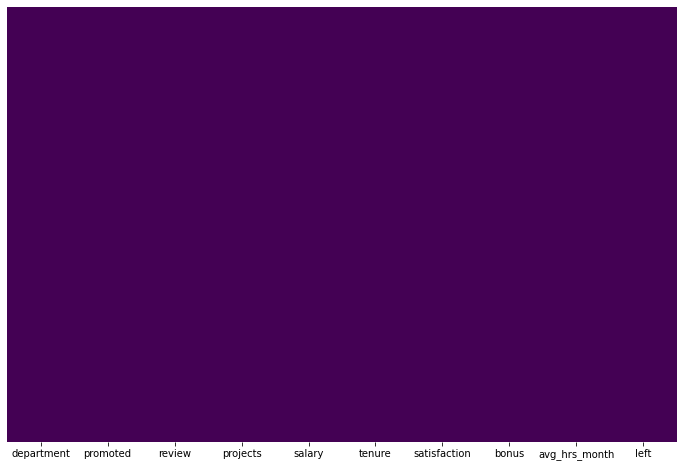

In [7]:
#is there any null data?
plt.figure(figsize=(12,8))
sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='viridis')
#no reason to fill null data or drop a column as there is no null values

<AxesSubplot:title={'center':'Distribution of Employees Based on Performance'}, xlabel='left', ylabel='review'>

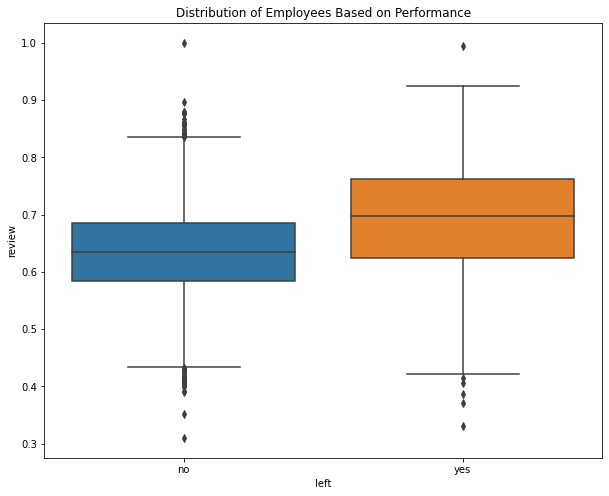

In [11]:
#data doesnt have null data. However, i assume that review has null data. This is how i would replace missing/null values
plt.figure(figsize=(10,8))
plt.title('Distribution of Employees Based on Performance')
sns.boxplot(x='left',y='review', data=df)
#employees who left tend to have higher review, that makes sense as better employees can find new jobs easier

In [9]:
def missingreview(cols):
    review=cols[0]
    left=cols[1]
    
    if pd.isnull(review):
        
        if left=='yes':
            return 0.7
        else:
            return 0.64
    else:
        return review
    
    

In [10]:
df['review']=df[['review','left']].apply(missingreview, axis=1)

In [10]:
print(df['review'])

0       0.577569
1       0.751900
2       0.722548
3       0.722548
4       0.676203
          ...   
9535    0.610988
9536    0.746887
9537    0.557980
9538    0.584446
9539    0.626373
Name: review, Length: 9540, dtype: float64


In [11]:
#Setting the white background for visuals
sns.set_style("whitegrid")

<AxesSubplot:xlabel='left', ylabel='count'>

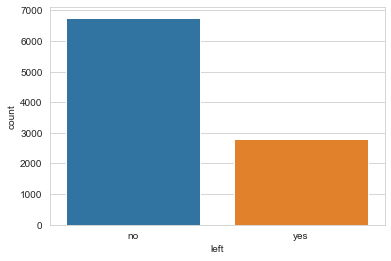

In [12]:
#ratio of actual target labels
sns.countplot(x='left', data=df)

# Analysing Salary Variable

<AxesSubplot:xlabel='left', ylabel='count'>

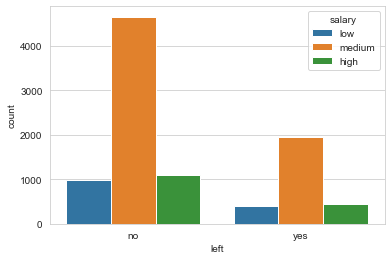

In [13]:
#To understand what led to employees quit, i am checking if salary seems any correlated with quitting
sns.countplot(x='left', hue='salary', data=df)
#i cannot see that salary was a big factor from the visual below

# Analysing Review Variable

In [14]:
#to understand the content of review column
df['review'].describe()

count    9540.000000
mean        0.651830
std         0.085311
min         0.310000
25%         0.592884
50%         0.647456
75%         0.708429
max         1.000000
Name: review, dtype: float64

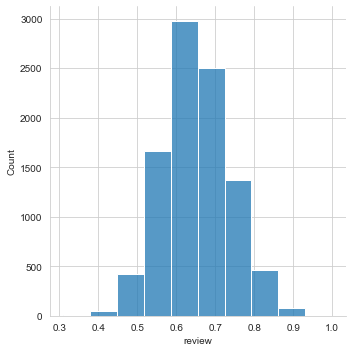

In [15]:
sns.displot(df['review'].dropna(), kde=False, bins=10)

In [16]:
#feature engineering, binning, to be able to use review and working hours data
df["review_note"]=pd.cut(df.review, bins=[0.00,0.65,1.00], labels=['Low Performance','High Performance'])

In [17]:
#Creating dummy columns for review note and dropping the first column to avoid multicollinearity
review_dummy=pd.get_dummies(df["review_note"],drop_first=True)

In [18]:
review_dummy.head()

,High Performance
0,0
1,1
2,1
3,1
4,1


<AxesSubplot:xlabel='left', ylabel='count'>

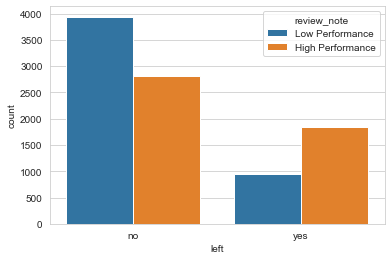

In [19]:
#To see if review notes was an important factor
sns.countplot(x='left', hue='review_note', data=df, dodge=True)
#High performers are more likely to quit than low performers

# Analyzing Average working hours per month 

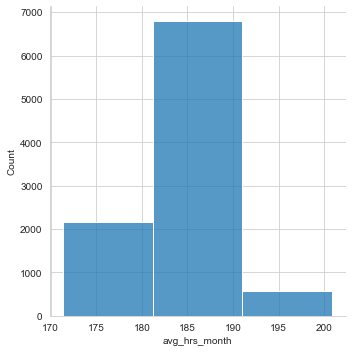

In [20]:
#lets see the distribution of average working hours
sns.displot(df['avg_hrs_month'].dropna(), kde=False, bins=3)

In [21]:
#Using cufflink to show the same information with an interactive graph
import cufflinks as cf
cf.go_offline()
df['avg_hrs_month'].iplot(kind='hist',bins=3)

In [22]:
#to understand the content of working hours column
df['avg_hrs_month'].describe()

count    9540.000000
mean      184.661571
std         4.144831
min       171.374061
25%       181.472085
50%       184.628795
75%       187.728708
max       200.861656
Name: avg_hrs_month, dtype: float64

In [23]:
#feature engineering to be able to use working hours data
df['Working Hours']=pd.cut(df.avg_hrs_month, bins=[0,185,200], labels=['Short Working Hours','Long Working Hours'])

In [24]:
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left,review_note,Working Hours
0,operations,0,0.577569,3,low,5,0.626759,0,180.866070,no,Low Performance,Short Working Hours
1,operations,0,0.751900,3,medium,6,0.443679,0,182.708149,no,High Performance,Short Working Hours
2,support,0,0.722548,3,medium,6,0.446823,0,184.416084,no,High Performance,Short Working Hours
3,logistics,0,0.722548,4,high,8,0.440139,0,188.707545,no,High Performance,Long Working Hours
4,sales,0,0.676203,3,high,5,0.577607,1,179.821083,no,High Performance,Short Working Hours


In [25]:
#Creating dummy columns for average working hours
hours_dummy=pd.get_dummies(df['Working Hours'],drop_first=True)
hours_dummy.head()

,Long Working Hours
0,0
1,0
2,0
3,1
4,0


<AxesSubplot:xlabel='left', ylabel='count'>

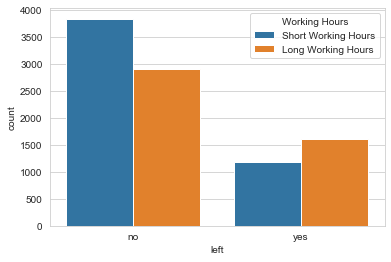

In [26]:
#To see if average working hours was an important factor
sns.countplot(x='left', hue='Working Hours', data=df, dodge=True)


# Analysing Satisfaction variable

In [27]:
df['satisfaction'].describe()

count    9540.000000
mean        0.504645
std         0.158555
min         0.000000
25%         0.386801
50%         0.500786
75%         0.622607
max         1.000000
Name: satisfaction, dtype: float64

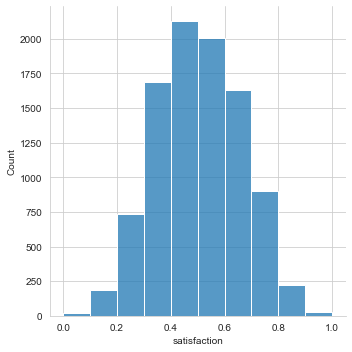

In [28]:
sns.displot(df['satisfaction'], bins=10, kde=False)

In [29]:
#Creating dummies for satisfaction
df["Happiness"]=pd.cut(df['satisfaction'], bins=[0,0.5,1], labels=["Happy", "Not Happy"] )
S_Dummy=pd.get_dummies(df["Happiness"], drop_first=True)
S_Dummy.head()

,Not Happy
0,1
1,0
2,0
3,0
4,1


# Analyzing Project Variable

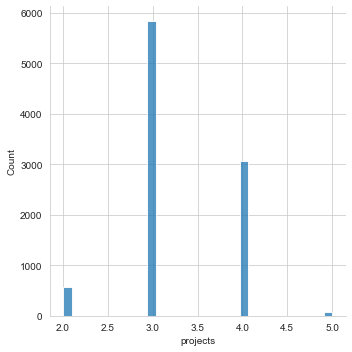

In [30]:
sns.displot(df['projects'], kde=False)
#Doesnt seem like an important variable as numbers range is small, 2-5.

# Formating the dataframe for machine learning 

In [31]:
#Merging dummy colunms to original dataframe
df=pd.concat([df,hours_dummy,review_dummy,S_Dummy], axis=1)
df.head(10)

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left,review_note,Working Hours,Happiness,Long Working Hours,High Performance,Not Happy
0,operations,0,0.577569,3,low,5,0.626759,0,180.866070,no,Low Performance,Short Working Hours,Not Happy,0,0,1
1,operations,0,0.751900,3,medium,6,0.443679,0,182.708149,no,High Performance,Short Working Hours,Happy,0,1,0
2,support,0,0.722548,3,medium,6,0.446823,0,184.416084,no,High Performance,Short Working Hours,Happy,0,1,0
3,logistics,0,0.722548,4,high,8,0.440139,0,188.707545,no,High Performance,Long Working Hours,Happy,1,1,0
4,sales,0,0.676203,3,high,5,0.577607,1,179.821083,no,High Performance,Short Working Hours,Not Happy,0,1,1
5,IT,0,0.683206,2,medium,5,0.565252,1,178.841879,no,High Performance,Short Working Hours,Not Happy,0,1,1
6,admin,0,0.620158,4,high,5,0.686951,0,181.142956,no,Low Performance,Short Working Hours,Not Happy,0,0,1
7,support,0,0.499567,4,medium,7,0.720451,1,184.977538,no,Low Performance,Short Working Hours,Not Happy,0,0,1
8,sales,0,0.652818,4,low,6,0.678696,0,183.655790,no,High Performance,Short Working Hours,Not Happy,0,1,1
9,sales,0,0.642031,3,medium,6,0.623365,0,181.851000,no,Low Performance,Short Working Hours,Not Happy,0,0,1


In [32]:
#Dropping columns that are not needed and might cause multicollinearity
df.drop(["review","satisfaction","avg_hrs_month","review_note","Working Hours","Happiness"], axis=1, inplace=True)
df.head()

,department,promoted,projects,salary,tenure,bonus,left,Long Working Hours,High Performance,Not Happy
0,operations,0,3,low,5,0,no,0,0,1
1,operations,0,3,medium,6,0,no,0,1,0
2,support,0,3,medium,6,0,no,0,1,0
3,logistics,0,4,high,8,0,no,1,1,0
4,sales,0,3,high,5,1,no,0,1,1


In [33]:
df.drop(['salary'], axis=1, inplace=True)
df.head()

,department,promoted,projects,tenure,bonus,left,Long Working Hours,High Performance,Not Happy
0,operations,0,3,5,0,no,0,0,1
1,operations,0,3,6,0,no,0,1,0
2,support,0,3,6,0,no,0,1,0
3,logistics,0,4,8,0,no,1,1,0
4,sales,0,3,5,1,no,0,1,1


In [36]:
df['left'].replace("no",0,inplace=True)


In [37]:
df['left'].replace('yes',1,inplace=True)

In [38]:
df.head()

,department,promoted,projects,tenure,bonus,left,Long Working Hours,High Performance,Not Happy
0,operations,0,3,5,0,0,0,0,1
1,operations,0,3,6,0,0,0,1,0
2,support,0,3,6,0,0,0,1,0
3,logistics,0,4,8,0,0,1,1,0
4,sales,0,3,5,1,0,0,1,1


In [56]:
df.drop(["department"], axis=1, inplace=True)

# Modelling logistic regression

In [57]:
X=df.drop("left",axis=1)
y=df['left']

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

In [60]:
logmodel = LogisticRegression()

In [61]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [65]:
predictions=logmodel.predict(X_test)

In [66]:
#for results of the model
from sklearn.metrics import classification_report

In [68]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.90      0.80      1347
           1       0.45      0.21      0.28       561

    accuracy                           0.69      1908
   macro avg       0.59      0.55      0.54      1908
weighted avg       0.65      0.69      0.65      1908



In [70]:
#confustion matrix
from sklearn.metrics import confusion_matrix

In [71]:
confusion_matrix(y_test, predictions)

array([[1207,  140],
       [ 445,  116]], dtype=int64)